Manipulation of <code>Call-receive-data.xlsx</code>.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
ss = pd.read_csv('small-sample.csv')

In [84]:
ss.dtypes

Period                   object
Media                    object
Channel                  object
Queue                    object
Transaction               int64
Origination              object
Customer                 object
Case Number             float64
Web Callback            float64
Create time              object
Agent                    object
Accept time              object
Transaction-Time         object
Post-processing-time     object
Total-time               object
Abandon-time             object
Voice mail left         float64
IVR-Treatment-Time       object
Hold-Max                 object
Hold-Count                int64
Hold-Total               object
PDD-Leg 1                object
PDD-Leg 2                object
AT-Leg 1                 object
AT-Leg 2                 object
dtype: object

In [85]:
ss.head()

,Period,Media,Channel,Queue,Transaction,Origination,Customer,Case Number,Web Callback,Create time,...,Abandon-time,Voice mail left,IVR-Treatment-Time,Hold-Max,Hold-Count,Hold-Total,PDD-Leg 1,PDD-Leg 2,AT-Leg 1,AT-Leg 2
0,18/07/2020,Email,customerservices@peoplesenergy.co.uk,Cancellations (2h),657601,keith.m.rowling@gmail.com,"(last name not available), Switchcraft",169337.2,NaN,18/07/2020 07:06:07,...,NaN,NaN,0:00:00,0:00:00,0,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00
1,18/07/2020,Email,customerservices@peoplesenergy.co.uk,Cancellations (2h),657686,kay.upcott@icloud.com,"Upcott, Kay",168705.2,NaN,18/07/2020 07:56:51,...,NaN,NaN,0:00:00,0:00:00,0,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00
2,18/07/2020,Email,customerservices@peoplesenergy.co.uk,Cancellations (2h),657705,kezp1@hotmail.co.uk,"PRICE, KELLY",170233.0,NaN,18/07/2020 08:02:12,...,NaN,NaN,0:00:00,0:00:00,0,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00
3,18/07/2020,Email,customerservices@peoplesenergy.co.uk,Cancellations (2h),657732,cazsheru63@hotmail.co.uk,"kelly, caroline",170245.0,NaN,18/07/2020 08:11:37,...,NaN,NaN,0:00:00,0:00:00,0,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00
4,18/07/2020,Email,customerservices@peoplesenergy.co.uk,Cancellations (2h),657758,collisaugustine1303@gmail.com,"Augustine, Collis",170263.0,NaN,18/07/2020 08:19:44,...,18/07/2020 09:38:37,NaN,0:00:00,0:00:00,0,0:00:00,0:00:00,0:00:00,0:00:00,0:00:00


In [86]:
def was_abandoned(row):
    if pd.isnull(row['Abandon-time']):
        return False
    else:
        return True
    
ss['Abandoned'] = ss.apply(lambda r: was_abandoned(r), axis=1)

In [88]:
ss['Create time'] = pd.to_datetime(ss['Create time'], format='%d/%m/%Y %H:%M:%S', errors='ignore')
ss['Accept time'] = pd.to_datetime(ss['Accept time'], format='%d/%m/%Y %H:%M:%S', errors='ignore')
ss['Total-time'] = pd.to_timedelta(ss['Total-time'])
ss['Abandon-time'] = pd.to_datetime(ss['Abandon-time'], format='%d/%m/%Y %H:%M:%S', errors='ignore')

In [89]:
ss.dtypes

Period                           object
Media                            object
Channel                          object
Queue                            object
Transaction                       int64
Origination                      object
Customer                         object
Case Number                     float64
Web Callback                    float64
Create time              datetime64[ns]
Agent                            object
Accept time              datetime64[ns]
Transaction-Time                 object
Post-processing-time             object
Total-time              timedelta64[ns]
Abandon-time             datetime64[ns]
Voice mail left                 float64
IVR-Treatment-Time               object
Hold-Max                         object
Hold-Count                        int64
Hold-Total                       object
PDD-Leg 1                        object
PDD-Leg 2                        object
AT-Leg 1                         object
AT-Leg 2                         object


In [90]:
def calc_abandon_time(row):
    if row['Abandoned']:
        return row['Abandon-time'] - row['Create time']      
    else:
        return None

ss['Abandoned-after'] = ss[['Create time', 'Abandon-time', 'Abandoned']].apply(lambda r: calc_abandon_time(r), axis=1)

In [91]:
ss.columns

Index(['Period', 'Media', 'Channel', 'Queue', 'Transaction', 'Origination',
       'Customer', 'Case Number', 'Web Callback', 'Create time', 'Agent',
       'Accept time', 'Transaction-Time', 'Post-processing-time', 'Total-time',
       'Abandon-time', 'Voice mail left', 'IVR-Treatment-Time', 'Hold-Max',
       'Hold-Count', 'Hold-Total', 'PDD-Leg 1', 'PDD-Leg 2', 'AT-Leg 1',
       'AT-Leg 2', 'Abandoned', 'Abandoned-after'],
      dtype='object')

In [92]:
ss.rename(columns={'Create time': 'Create-time', 'Accept time': 'Accept-time'}, inplace=True)

We want to create a fresh dataframe not a view of <code>ss</code>.

In [93]:
data = ss.loc[:, ['Create-time', 'Agent', 'Accept-time', 'Total-time', 'Abandon-time', 'Abandoned', 'Abandoned-after']]

In [94]:
data.head()

,Create-time,Agent,Accept-time,Total-time,Abandon-time,Abandoned,Abandoned-after
0,2020-07-18 07:06:07,Sam Rogers (agwmMVWB5aRSGmsXedTzQdcQ),2020-07-18 10:58:07,0 days 00:03:06,NaT,False,NaT
1,2020-07-18 07:56:51,Leanne Martin (agSZxR7TcsSqiS6AXQfrBTfA),2020-07-18 10:58:23,0 days 00:04:26,NaT,False,NaT
2,2020-07-18 08:02:12,Sam Rogers (agwmMVWB5aRSGmsXedTzQdcQ),2020-07-18 11:01:14,0 days 00:07:10,NaT,False,NaT
3,2020-07-18 08:11:37,Leanne Martin (agSZxR7TcsSqiS6AXQfrBTfA),2020-07-18 11:02:50,0 days 00:05:44,NaT,False,NaT
4,2020-07-18 08:19:44,NaN,NaT,NaT,2020-07-18 09:38:37,True,0 days 01:18:53


In [95]:
data['time-to-accept'] = data.apply(lambda r: r['Accept-time'] - r['Create-time'], axis=1)

In [96]:
data.dtypes

Create-time         datetime64[ns]
Agent                       object
Accept-time         datetime64[ns]
Total-time         timedelta64[ns]
Abandon-time        datetime64[ns]
Abandoned                     bool
Abandoned-after    timedelta64[ns]
time-to-accept     timedelta64[ns]
dtype: object

In [97]:
max(data['Accept-time'])

Timestamp('2020-07-21 10:08:25')

In [98]:
min(data['Accept-time'])

Timestamp('2020-07-18 10:58:07')

In [99]:
duration = max(data['Accept-time']) - min(data['Accept-time'])
print(duration)

2 days 23:10:18


In [100]:
def minutes_in_duration(d):
    ndays = d.days
    
    return ndays * 24 * 60 + d.seconds//60

def nbins(minutes, width=5):
    return int(np.ceil(minutes/width))

mid = minutes_in_duration(duration)

print(f'minutes in duration = {mid}, number of bins = {nbins(mid)}')

minutes in duration = 4270, number of bins = 854


This is an **important** step. We group all calls in an interval of $5$ minutes.

In [101]:
inflow = data[['Create-time', 'Agent']].groupby(pd.Grouper(key='Create-time', freq='5min')).count()
inflow.reset_index(inplace=True)

In [102]:
data.dtypes

Create-time         datetime64[ns]
Agent                       object
Accept-time         datetime64[ns]
Total-time         timedelta64[ns]
Abandon-time        datetime64[ns]
Abandoned                     bool
Abandoned-after    timedelta64[ns]
time-to-accept     timedelta64[ns]
dtype: object

In [110]:
inflow

,Create-time,Agent
0,2020-07-18 00:10:00,1
1,2020-07-18 00:15:00,0
2,2020-07-18 00:20:00,0
3,2020-07-18 00:25:00,0
4,2020-07-18 00:30:00,0
...,...,...
268,2020-07-18 22:30:00,0
269,2020-07-18 22:35:00,0
270,2020-07-18 22:40:00,0
271,2020-07-18 22:45:00,0


<AxesSubplot:xlabel='Create-time', ylabel='Agent'>

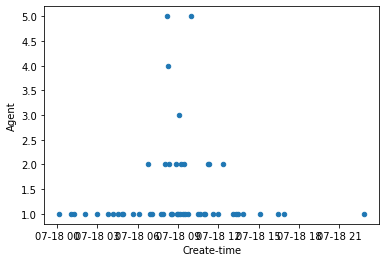

In [95]:
inflow.loc[inflow['Agent'] > 0].plot.scatter(x='Create-time', y='Agent')

In [96]:
inflow.iloc[inflow['Agent'].idxmax()]

Create-time    2020-07-18 08:10:00
Agent                            5
Name: 96, dtype: object

In [97]:
inflow.to_csv('small-sample-inflow.csv', index=False)

In [107]:
data['Total-time'] = data['Total-time'].apply(lambda r: r.total_seconds())

In [112]:
total_time = data[['Create-time', 'Total-time']].groupby(pd.Grouper(key='Create-time', freq='5min')).mean()

In [113]:
type(data['Total-time'][0])

numpy.float64

In [114]:
total_time.head()

,Total-time
Create-time,
2020-07-18 00:10:00,13.0
2020-07-18 00:15:00,NaN
2020-07-18 00:20:00,NaN
2020-07-18 00:25:00,NaN
2020-07-18 00:30:00,NaN


In [116]:
total_time.loc[~total_time['Total-time'].isnull()].head()

,Total-time
Create-time,
2020-07-18 00:10:00,13.0
2020-07-18 01:00:00,245.0
2020-07-18 01:15:00,16.0
2020-07-18 02:05:00,11.0
2020-07-18 03:00:00,184.0


In [117]:
total_time.reset_index(inplace=True)

In [118]:
total_time.head()

,Create-time,Total-time
0,2020-07-18 00:10:00,13.0
1,2020-07-18 00:15:00,NaN
2,2020-07-18 00:20:00,NaN
3,2020-07-18 00:25:00,NaN
4,2020-07-18 00:30:00,NaN


In [119]:
total_time.to_csv('small-sample-total-time.csv', index=False)